In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype('float32') / 255
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
#Limit the values between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_img = Input(shape=(28, 28, 1))

In [ ]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,epochs=120,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 12s 205us/step - loss: 0.3328 - val_loss: 0.3080
Epoch 2/120
60000/60000 [==============================] - 5s 80us/step - loss: 0.3030 - val_loss: 0.3028
Epoch 3/120
60000/60000 [==============================] - 5s 81us/step - loss: 0.2993 - val_loss: 0.3004
Epoch 4/120
60000/60000 [==============================] - 5s 81us/step - loss: 0.2971 - val_loss: 0.2981
Epoch 5/120
60000/60000 [==============================] - 5s 82us/step - loss: 0.2955 - val_loss: 0.2969
Epoch 6/120
60000/60000 [==============================] - 5s 82us/step - loss: 0.2944 - val_loss: 0.2961
Epoch 7/120
60000/60000 [==============================] - 5s 81us/step - loss: 0.2934 - val_loss: 0.2952
Epoch 8/120
60000/60000 [==============================] - 5s 81us/step - loss: 0.2925 - val_loss: 0.2940
Epoch 9/120
60000/60000 [==============================] - 5s 82us/step - loss: 0.2918 - val_loss: 0

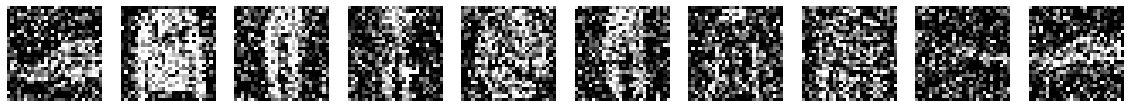

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
denoised_img = autoencoder.predict(x_test_noisy)

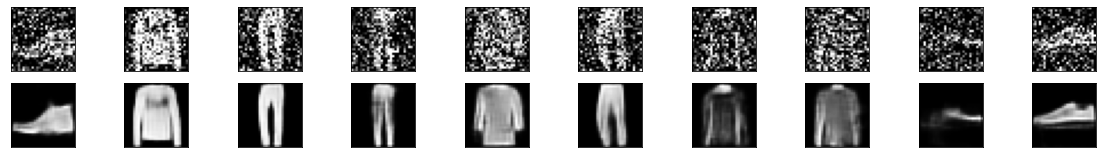

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()